<a href="https://colab.research.google.com/github/Mir-Inayat/IIITH-Internship/blob/main/yolo_v8_skin_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Aug 10 09:31:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.1/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="*******************")
project = rf.workspace("data-science-tnitc").project("skin-diseases-i30ay-cpycv")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to skin-diseases-1 in yolov8:: 100%|██████████| 3310/3310 [00:00<00:00, 7213.18it/s]


## Custom Training

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.yaml data={HOME}/skin-diseases-1/data.yaml epochs=80 imgsz=800 plots=True

/content
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/skin-diseases-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

In [11]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


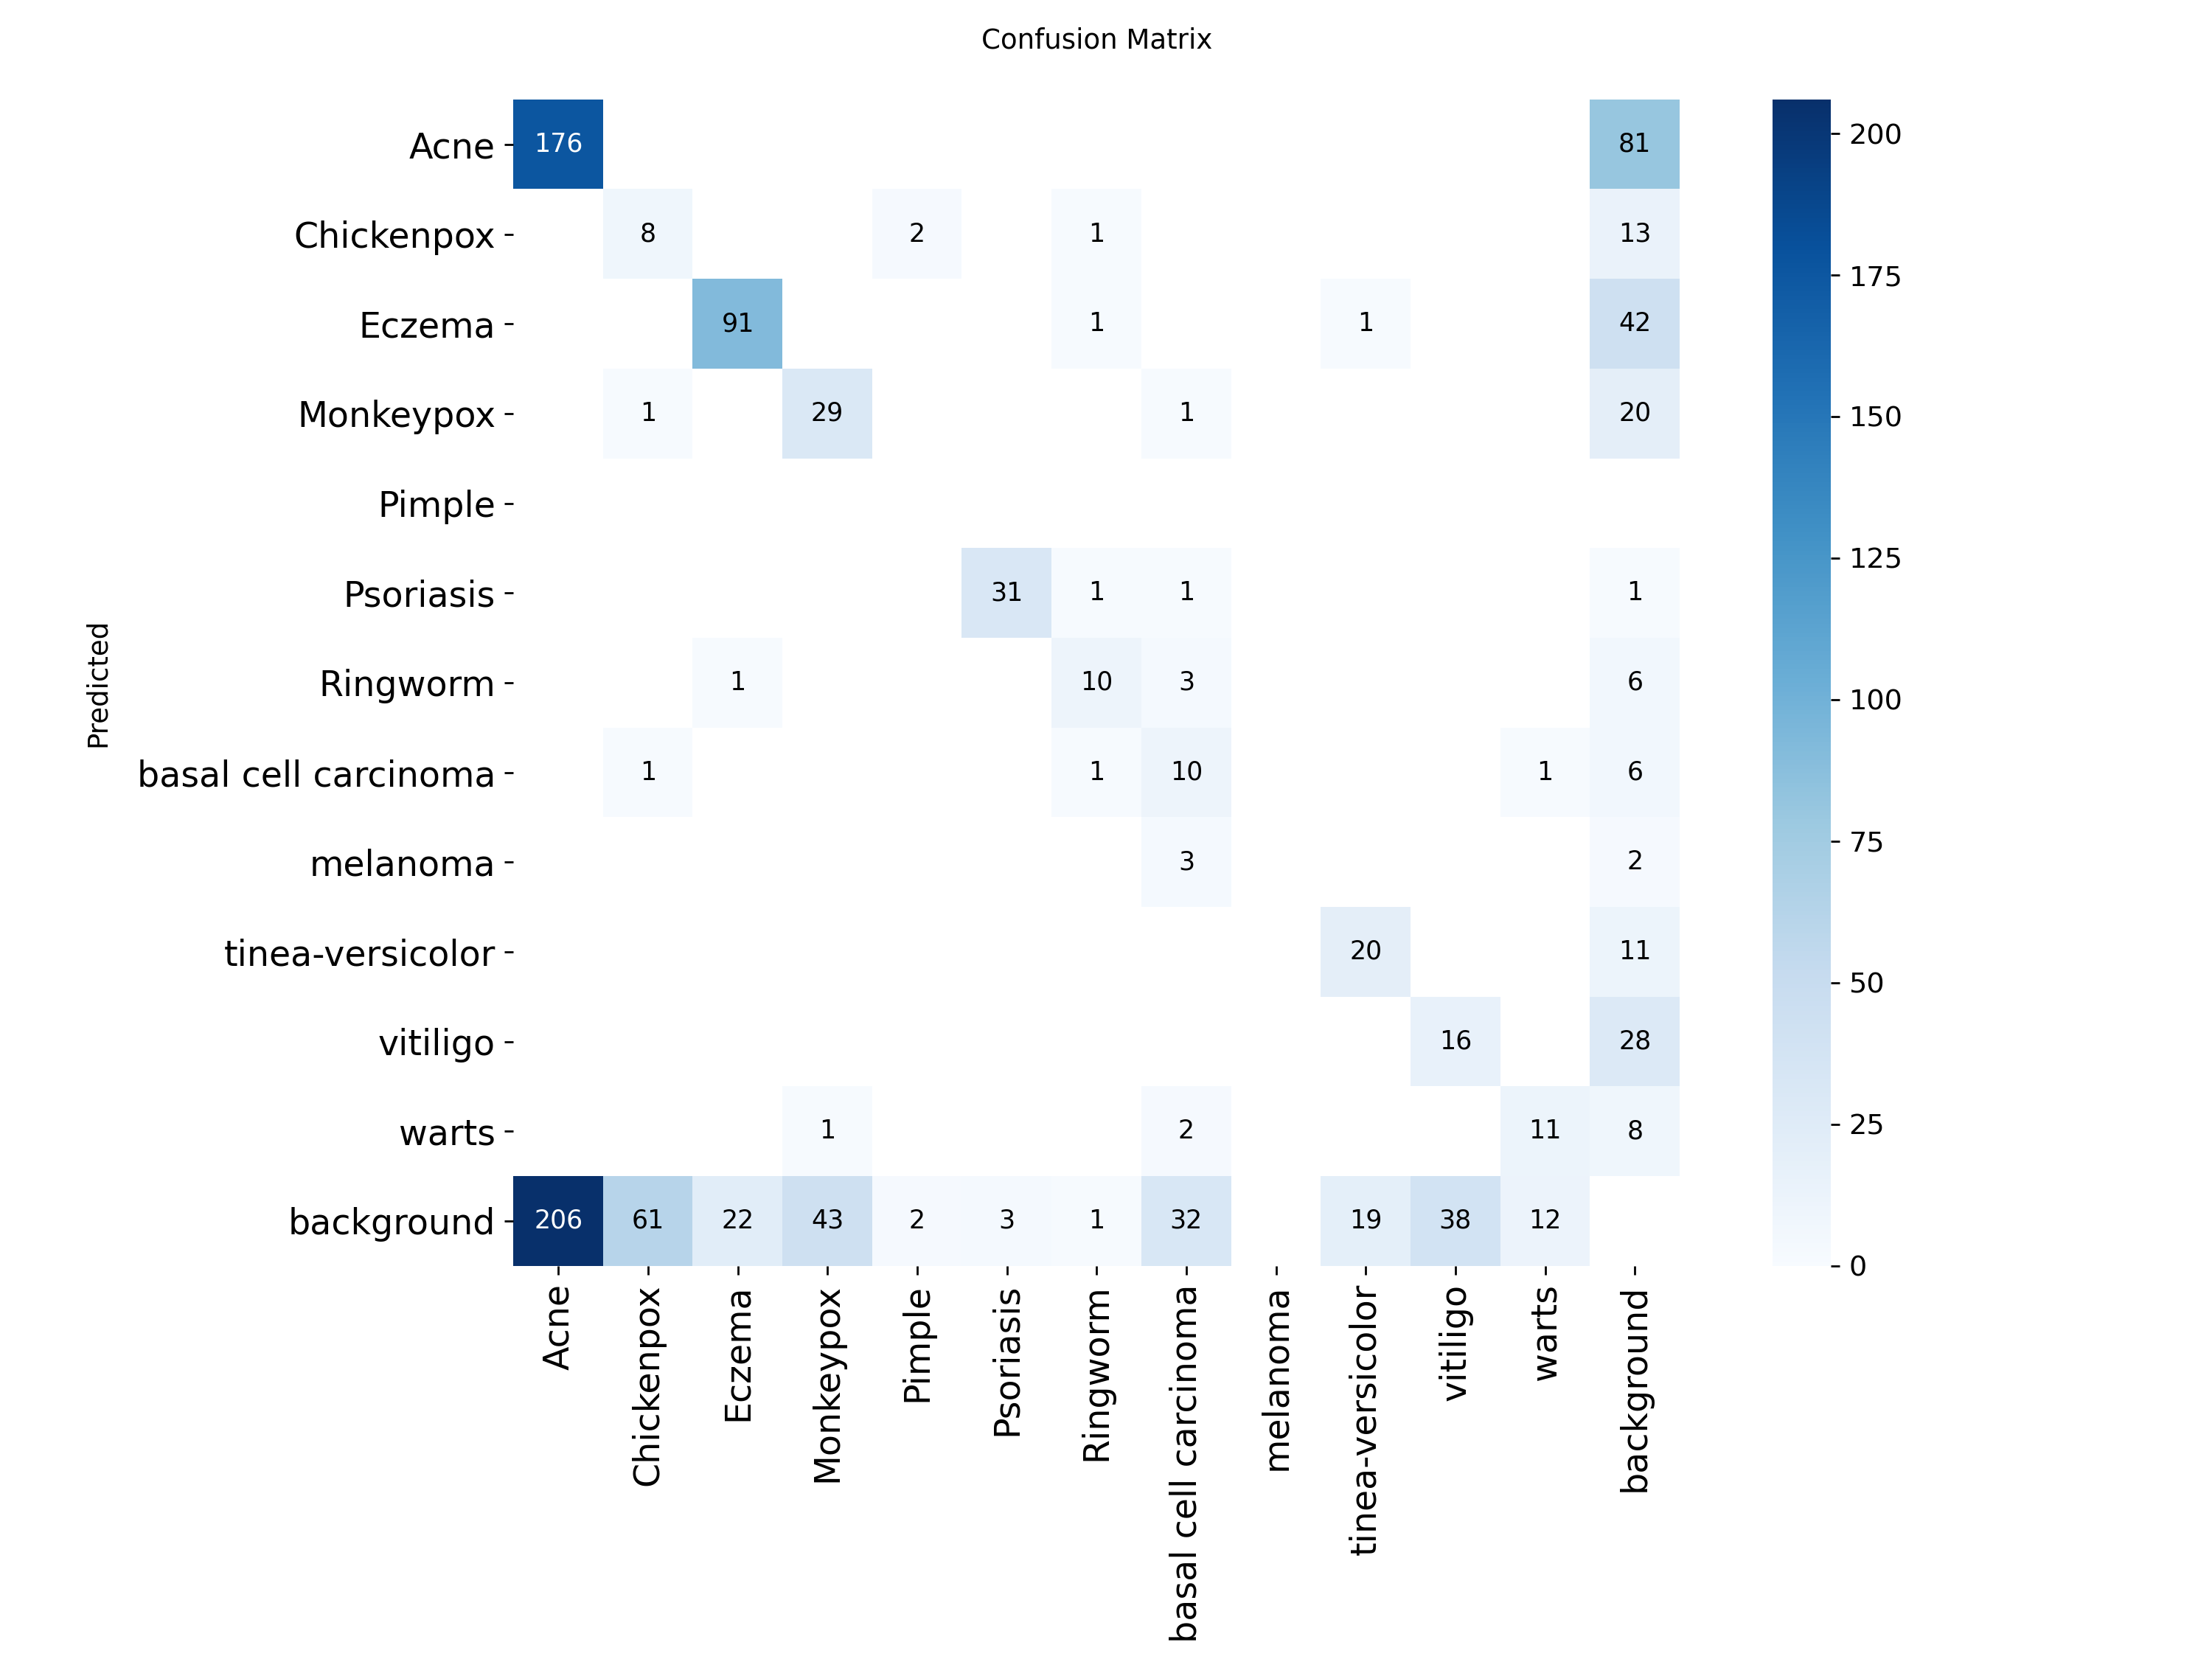

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


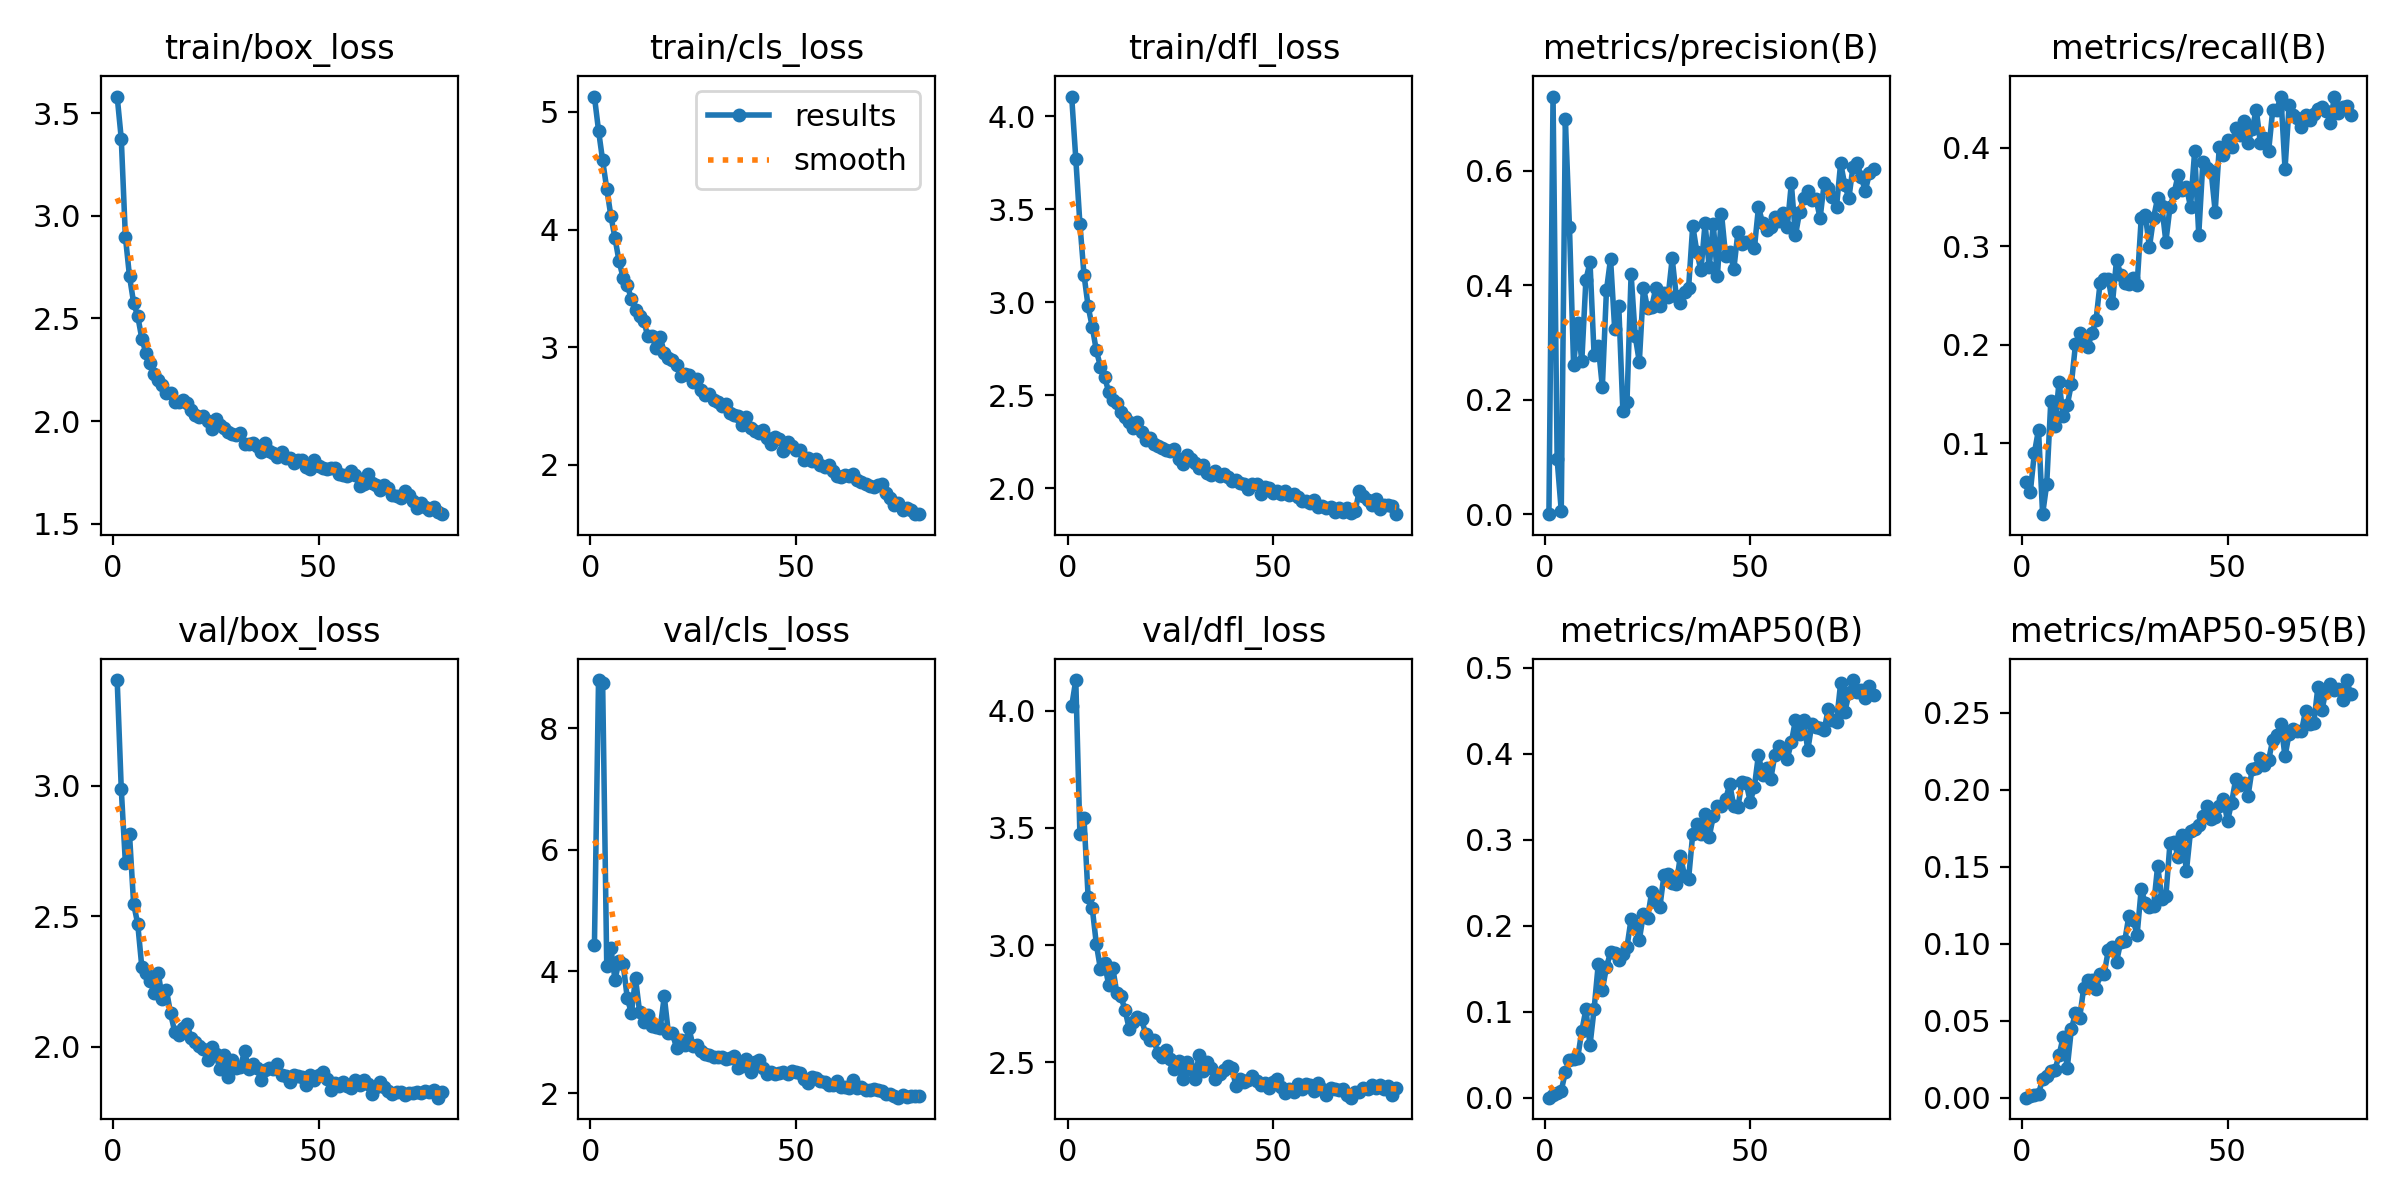

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


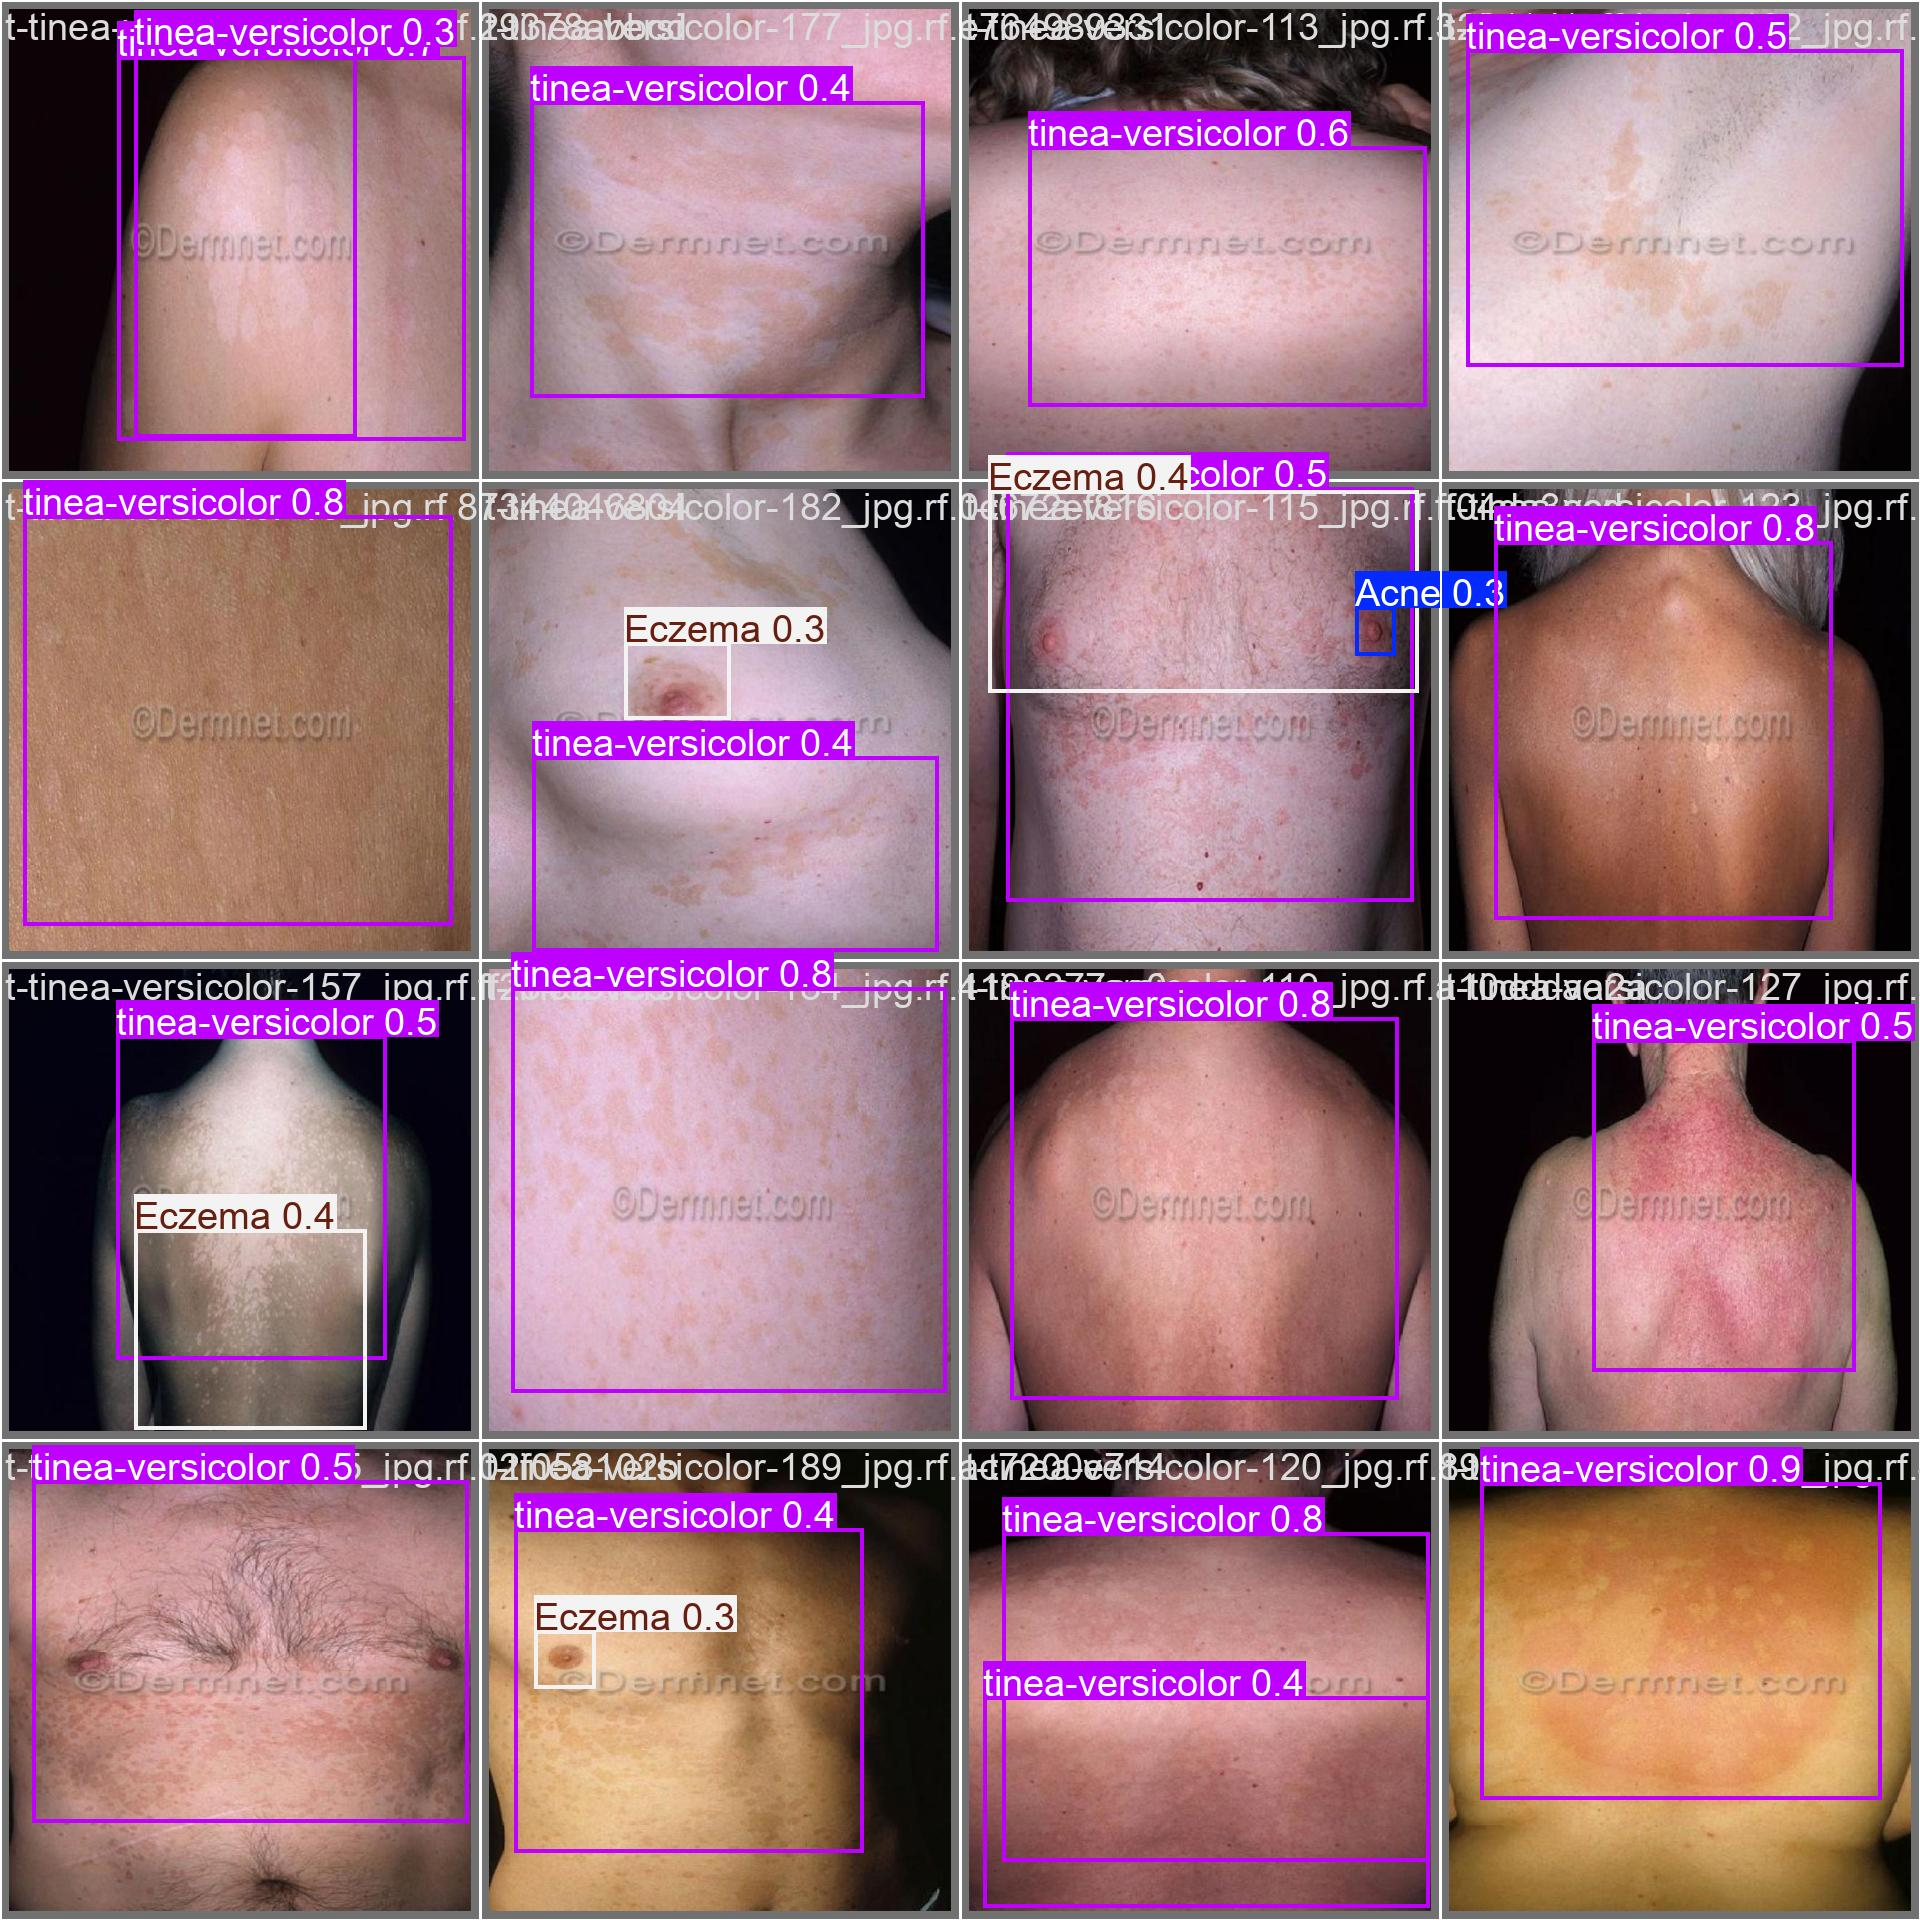

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [20]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={HOME}/skin-diseases-1/data.yaml

/content
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1309.6±421.9 MB/s, size: 41.9 KB)
val: Scanning /content/skin-diseases-1/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100% 264/264 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 175, len(boxes) = 863. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:11<00:00,  1.54it/s]
                   all        264        863      0.597      0.443       0.48      0.272
                  Acne         27        382      0.644      0.455      0.513      0.175
            Chickenpox         21  

## Inference with Custom Model

In [22]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={HOME}/skin-diseases-1/test/images save=True

/content
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,846,708 parameters, 0 gradients, 78.7 GFLOPs

image 1/193 /content/skin-diseases-1/test/images/3_12_jpg.rf.690c02ceadb65d4599565be283b959e8.jpg: 800x800 2 Chickenpoxs, 56.8ms
image 2/193 /content/skin-diseases-1/test/images/6_70_jpg.rf.f30ff1c2a3b76c95b41082e106e67ce3.jpg: 800x800 2 Ringworms, 53.1ms
image 3/193 /content/skin-diseases-1/test/images/7_3_jpg.rf.bf322665be9813aa52c3c3babd5d0bd6.jpg: 800x800 1 Ringworm, 53.0ms
image 4/193 /content/skin-diseases-1/test/images/800px-Yeartinfection-Copy_jpg.rf.d4dba09ab3d6c8488dcea2db2c4d44a4.jpg: 800x800 1 Ringworm, 53.0ms
image 5/193 /content/skin-diseases-1/test/images/CHP_03_01_jpg.rf.ad4cab0bf9701e48cf281a693925ca63.jpg: 800x800 6 Chickenpoxs, 32.0ms
image 6/193 /content/skin-diseases-1/test/images/CHP_06_01_jpg.rf.34715df90d68d8d5bd5afbfc7ce1979e.jpg: 800x800 1 Chickenpox, 1 basal cell carcinoma, 31.7ms
imag